In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

In [3]:
right_stringer_data = pd.read_excel(r"C:\Users\anand\Desktop\RULA Predictor Summary Statistics\right_stringer_data.xlsx")
right_camel_hump_data = pd.read_excel(r"C:\Users\anand\Desktop\RULA Predictor Summary Statistics\right_camel_hump_data.xlsx")
left_stringer_data = pd.read_excel(r"C:\Users\anand\Desktop\RULA Predictor Summary Statistics\left_stringer_data.xlsx")
left_camel_hump_data = pd.read_excel(r"C:\Users\anand\Desktop\RULA Predictor Summary Statistics\left_camel_hump_data.xlsx")

# Column names are
#Participant ID,Accuracy, True Low Predicted Medium, True Low Predicted High,True Medium Predicted High, True Medium Predicted Low,
#True High Predicted Medium, True High Predicted Low
# right_stringer_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\right_stringer_data.xlsx")
# right_camel_hump_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\right_camel_hump_data.xlsx")
# left_stringer_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\left_stringer_data.xlsx")
# left_camel_hump_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\left_camel_hump_data.xlsx")
hal_right_stringer_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\right_stringer_data.xlsx")
hal_right_camel_hump_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\right_camel_hump_data.xlsx")
hal_left_stringer_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\left_stringer_data.xlsx")
hal_left_camel_hump_data = pd.read_excel(r"C:\Users\anand\Desktop\HAL Predictor Summary Statistics\left_camel_hump_data.xlsx")

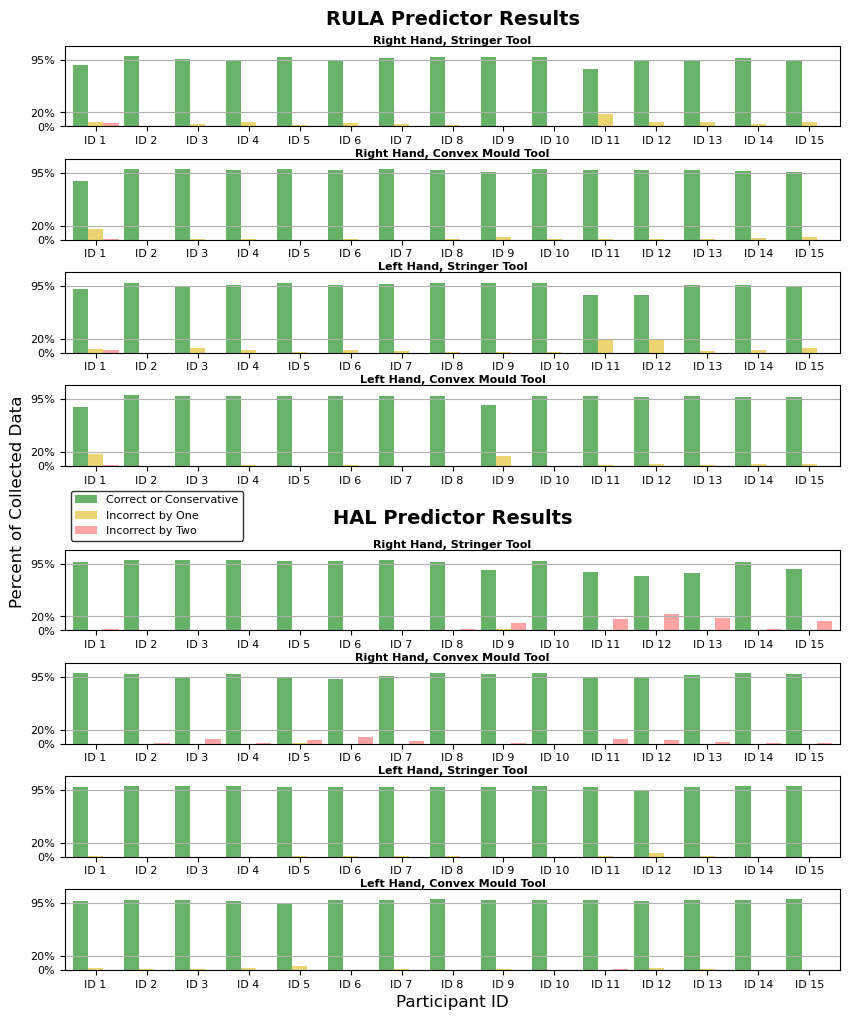

In [92]:
bar_width = 0.3
indices = np.arange(15)
subplot_title_font_size = 8
rula_data_list = [right_stringer_data, right_camel_hump_data, left_stringer_data, left_camel_hump_data]
hal_data_list = [hal_right_stringer_data, hal_right_camel_hump_data, hal_left_stringer_data, hal_left_camel_hump_data]
title_list = ['Right Hand, Stringer Tool','Right Hand, Convex Mould Tool','Left Hand, Stringer Tool','Left Hand, Convex Mould Tool']
fig = plt.figure(figsize=(10, 12))

outer_grid = gridspec.GridSpec(2, 1, wspace=0.1, hspace=0.2)

for idx in range(2):
    
    # Inner grid title 
    if idx == 0:
        inner_grid = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer_grid[idx], hspace = 0.4)
        # Set title for inner grid
        main_ax = fig.add_subplot(inner_grid[idx])
        main_ax.set_title('RULA Predictor Results', fontsize=14, pad=15, fontweight='bold')
        main_ax.axis('off')
        # plt.xlabel('Participant ID', fontsize=10)
        
        for inner_grid_idx in range(4):
            # axs[0].bar(indices - bar_width, data['Correct or Conservative'], width=bar_width, color='green',alpha = 0.6, label='Correct or Conservative')
            # axs[0].bar(indices, data['Incorrect by One'], width=bar_width, color='#d4aa00', alpha = 0.5, label='Incorrect by One')  # Darker yellow
            # # axs[0].bar(indices + bar_width, data['Incorrect by Two'], width=bar_width, color='#ff9999', label='Incorrect by Two')  # Lighter red
            # correct_or_conservative = right_stringer_data['Accuracy']+right_stringer_data['True Low Predicted Medium']+right_stringer_data['True Medium Predicted High']
            # incorrect_by_one = right_stringer_data['True Medium Predicted Low']+right_stringer_data['True High Predicted Medium']
            # incorrect_by_two = right_stringer_data['True High Predicted Low']+right_stringer_data['True Low Predicted High']
            # data = pd.DataFrame({'Correct or Conservative': correct_or_conservative, 'Incorrect by One': incorrect_by_one, 'Incorrect by Two': incorrect_by_two})
            correct_or_conservative = rula_data_list[inner_grid_idx]['Accuracy']+rula_data_list[inner_grid_idx]['True Low Predicted Medium']+rula_data_list[inner_grid_idx]['True Medium Predicted High']
            incorrect_by_one = rula_data_list[inner_grid_idx]['True Medium Predicted Low']+rula_data_list[inner_grid_idx]['True High Predicted Medium']
            incorrect_by_two = rula_data_list[inner_grid_idx]['True High Predicted Low']+rula_data_list[inner_grid_idx]['True Low Predicted High']
            rula_data_list[inner_grid_idx] = pd.DataFrame({'Correct or Conservative': correct_or_conservative, 'Incorrect by One': incorrect_by_one, 'Incorrect by Two': incorrect_by_two})
            ax = fig.add_subplot(inner_grid[inner_grid_idx], sharex=main_ax)
            # axs[0].set_xlim(left=-0.6, right=14.6)
            ax.set_xlim(left=-0.6, right=14.6)
            ax.bar(indices-bar_width, rula_data_list[inner_grid_idx]['Correct or Conservative'], width=bar_width, color='green', alpha=0.6, label='Correct or Conservative')
            ax.bar(indices, rula_data_list[inner_grid_idx]['Incorrect by One'], width=bar_width, alpha=0.7,color='#e5c433', label='Incorrect by One')
            ax.bar(indices+bar_width, rula_data_list[inner_grid_idx]['Incorrect by Two'], width=bar_width, alpha=0.9,color='#ff9999', label='Incorrect by Two')
            # axs[0].set_yticks([0,0.20,0.95])
            # y_vals = axs[0].get_yticks()
            # axs[0].set_yticklabels(['{:,.0%}'.format(x) for x in y_vals])
            # axs[0].grid(axis='y')
            # # Bold font for the title
            # axs[0].set_title('Right Hand, Stringer Tool', fontsize=subplot_title_font_size,pad = 0.5, fontweight='bold')
            ax.set_yticks([0, 0.20, 0.95])
            ax.set_ylim(0, 1.15)
            y_vals = ax.get_yticks()
            ax.set_yticklabels(['{:,.0%}'.format(x) for x in y_vals], fontsize=8)
            ax.grid(axis='y')
            # Remove x tick labels
            # Integer x ticks
            ax.set_xticks(indices, [f'ID {i+1}' for i in range(15)], fontsize=8)
            # Bold font for the title
            ax.set_title(title_list[inner_grid_idx], fontsize=subplot_title_font_size, pad=0.5, fontweight='bold')
        main_ax.set_xlabel('Participant ID', fontsize=10)
    else:
        inner_grid = gridspec.GridSpecFromSubplotSpec(4, 1, subplot_spec=outer_grid[idx], hspace=0.4)
        # Set title for inner grid
        main_ax = fig.add_subplot(inner_grid[idx])
        main_ax.set_title('HAL Predictor Results', fontsize=14, fontweight = 'bold',pad=100)
        main_ax.axis('off')
        # fig.text(0.04, 0.5, 'Percent of Collected Data', va='center', rotation='vertical', fontsize=10)
        # main_ax.text(0.04, 0.5, 'Percent of Collected Data', va='center', rotation='vertical', fontsize=10)
        for inner_grid_idx in range(4):
            correct_or_conservative = hal_data_list[inner_grid_idx]['Accuracy']+hal_data_list[inner_grid_idx]['True Low Predicted Medium']+hal_data_list[inner_grid_idx]['True Medium Predicted High']
            incorrect_by_one = hal_data_list[inner_grid_idx]['True Medium Predicted Low']+hal_data_list[inner_grid_idx]['True High Predicted Medium']
            incorrect_by_two = hal_data_list[inner_grid_idx]['True High Predicted Low']+hal_data_list[inner_grid_idx]['True Low Predicted High']
            hal_data_list[inner_grid_idx] = pd.DataFrame({'Correct or Conservative': correct_or_conservative, 'Incorrect by One': incorrect_by_one, 'Incorrect by Two': incorrect_by_two})
            ax = fig.add_subplot(inner_grid[inner_grid_idx])
            ax.set_xlim(left=-0.6, right=14.6)
            ax.bar(indices-bar_width, hal_data_list[inner_grid_idx]['Correct or Conservative'], width=bar_width, color='green', alpha=0.6, label='Correct or Conservative')
            ax.bar(indices, hal_data_list[inner_grid_idx]['Incorrect by One'], width=bar_width, alpha=0.7,color='#e5c433', label='Incorrect by One')
            ax.bar(indices+bar_width, hal_data_list[inner_grid_idx]['Incorrect by Two'], width=bar_width, alpha=0.9,color='#ff9999', label='Incorrect by Two')
            ax.set_yticks([0, 0.20, 0.95])
            y_vals = ax.get_yticks()
            ax.set_ylim(0, 1.15)
            ax.set_yticklabels(['{:,.0%}'.format(x) for x in y_vals], fontsize=8)
            ax.grid(axis='y')
            ax.set_xticks(indices, [f'ID {i+1}' for i in range(15)], fontsize=8)
            if inner_grid_idx == 0:
                ax.legend(loc='upper left', bbox_to_anchor=(0., 1.80),fontsize = 8,edgecolor = 'black')
            # Bold font for the title
            ax.set_title(title_list[inner_grid_idx], fontsize=subplot_title_font_size, pad=0.5, fontweight='bold')
plt.xlabel('Participant ID', fontsize=12)
fig.text(0.07, 0.5, 'Percent of Collected Data', va='center', rotation='vertical', fontsize=12)

plt.xticks(indices, [f'ID {i+1}' for i in range(15)])

plt.savefig(r"C:\Users\anand\Desktop\ergo paper figures\HAL_RULA_Predictor_Results.svg", format='svg', dpi=1200, bbox_inches='tight', pad_inches=0)